# Project Wattpad
## Data Analysis
This jupyter notebook contains the analysis for the Wattpad stories

In [3]:
# Import Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
stories_df = pd.read_csv(os.path.join('Data', 'stories_merge.csv'))
stories_df.head()

,Unnamed: 0,Unnamed: 0_x,categories_x,commentCount_x,completed_x,copyright_x,cover_x,cover_timestamp_x,createDate_x,deleted_x,...,parts,rating,readCount,tags,title,url,user.avatar,user.fullname,user.name,voteCount
0,0,0.0,"[19, 0]",5184.0,True,1.0,https://a.wattpad.com/cover/12050237-256-k9918...,2014-01-29T18:37:29Z,2014-01-29T16:24:42Z,False,...,"[{'id': 36978107, 'title': 'Prologue', 'url': ...",3.0,2688905.0,"['alpha', 'curse', 'luna', 'magic', 'power', '...",Hadar #Watty2014,https://www.wattpad.com/story/12050237-hadar-w...,https://a.wattpad.com/useravatar/RevyRogue.128...,Reviana,RevyRogue,106844.0
1,1,1.0,"[19, 0]",132.0,False,1.0,https://a.wattpad.com/cover/73708370-256-k6857...,2016-05-31T16:08:51Z,2016-05-31T15:17:16Z,False,...,"[{'id': 264398992, 'title': '①. ', 'url': 'htt...",0.0,82579.0,[],Funny quotes part 1,https://www.wattpad.com/story/73708370-funny-q...,https://a.wattpad.com/useravatar/Officialrenie...,Litty,Officialrenie,1222.0
2,2,2.0,"[19, 0]",9695.0,True,0.0,https://a.wattpad.com/cover/42937930-256-k9921...,2015-06-22T23:55:46Z,2015-06-22T23:55:09Z,False,...,"[{'id': 141082265, 'title': 'lol!', 'url': 'ht...",0.0,1344254.0,"['dumb', 'funny', 'listen', 'nothing', 'okay']",❇awsome comebacks❇,https://www.wattpad.com/story/42937930-%E2%9D%...,https://a.wattpad.com/useravatar/kittygirl_121...,NaN,kittygirl_121604,37258.0
3,3,3.0,"[19, 0]",19995.0,True,0.0,https://a.wattpad.com/cover/16618124-256-k6626...,2014-09-25T23:31:02Z,2014-05-20T12:25:26Z,False,...,"[{'id': 50914516, 'title': 'Escorting the Brut...",3.0,8554166.0,[],Escorting the Brute,https://www.wattpad.com/story/16618124-escorti...,https://a.wattpad.com/useravatar/iwillluv1d4ev...,Q.,iwillluv1d4ever,189277.0
4,4,4.0,"[19, 0]",1096.0,False,0.0,https://a.wattpad.com/cover/3663960-256-k24758...,2013-03-26T04:39:47Z,2013-01-04T19:19:21Z,False,...,"[{'id': 10656623, 'title': 'My Alpha JERK!', '...",3.0,736680.0,[],My Alpha JERK! (On Hold),https://www.wattpad.com/story/3663960-my-alpha...,https://a.wattpad.com/useravatar/nesha23.128.7...,NaN,nesha23,14534.0


In [5]:
cat_df = pd.read_csv("Data/categories.csv")
cat_df

,ID,NAME
0,4,Romance
1,5,Science Fiction
2,3,Fantasy
3,7,Humor
4,12,Paranormal
5,8,Mystery / Thriller
6,9,Horror
7,11,Adventure
8,23,Historical Fiction
9,1,Teen Fiction


In [13]:
stories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 95 columns):
Unnamed: 0                         1871 non-null int64
Unnamed: 0_x                       1465 non-null float64
categories_x                       1465 non-null object
commentCount_x                     1465 non-null float64
completed_x                        1465 non-null object
copyright_x                        1465 non-null float64
cover_x                            1465 non-null object
cover_timestamp_x                  1465 non-null object
createDate_x                       1465 non-null object
deleted_x                          1465 non-null object
description_x                      900 non-null object
firstPartId_x                      1465 non-null float64
firstPublishedPart.createDate_x    1465 non-null object
firstPublishedPart.id_x            1465 non-null float64
id                                 1871 non-null int64
language.id_x                      1465 non-null fl

In [7]:
############ TODO: Remove this once we have good data
for i in range(100):
    stories_df.iloc[i,10] = 11
    stories_df.iloc[i,11] = "Adventure"
for i in range(100, 300):
    stories_df.iloc[i,10] = 3
    stories_df.iloc[i,11] = "Fantasy"
for i in range(300, 450):
    stories_df.iloc[i,10] = 14
    stories_df.iloc[i,11] = "Action"

## Distribution of stories by category and language

In [8]:
category_grp = stories_df.groupby("categoryName", as_index=False)
stories_by_category = category_grp.count()
stories_by_category

KeyError: 'categoryName'

In [9]:
# create a bar plot
sns.barplot(x=stories_by_category["categoryName"], y=stories_by_category["id"], data=stories_by_category, palette='rainbow', label="Stories by Category")

# set plot properties
plt.title("Distribution of stories by Category", size=20)
plt.ylabel("Number of stories", size=15)
plt.xlabel("Category", size=15)
plt.legend(stories_by_category["categoryName"], loc='center left', bbox_to_anchor=(1.0, 0.5))

# plot and save
plt.savefig("Images/dist_category_bar.png")
plt.show()

NameError: name 'stories_by_category' is not defined

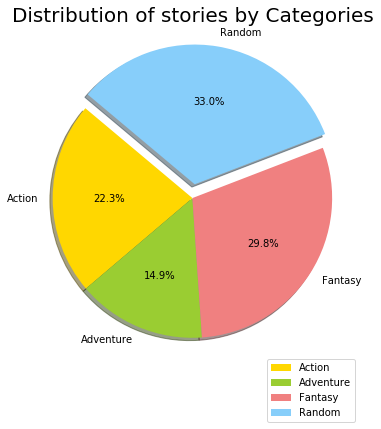

In [150]:
# create pie chart
plt.figure(1, figsize=(6,6))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)
patches, texts, autotexts = plt.pie(stories_by_category["id"], explode=explode,
                                    labels=stories_by_category["categoryName"], colors=colors,
                                    autopct='%1.1f%%', shadow=True, startangle=140)

# set plot properties
plt.legend(patches, stories_by_category["categoryName"], loc="best", bbox_to_anchor=(1,0))
plt.axis('equal')
plt.title("Distribution of stories by Categories", size=20)

# plot and save
plt.savefig("Images/dist_category_pie.png")
plt.show()

In [151]:
language_grp = stories_df.groupby("languageName", as_index=False)
stories_by_language = language_grp.count()
stories_by_language

,languageName,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,...,languageId,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,English,672,672,672,672,672,672,672,672,672,...,672,672,672,672,672,672,672,672,477,672


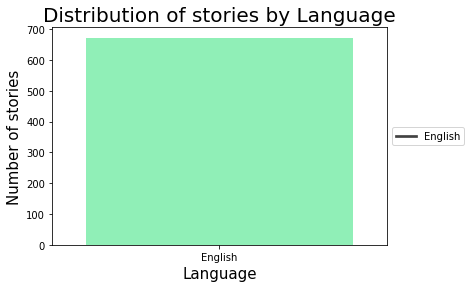

In [152]:
# create bar chart
sns.barplot(x=stories_by_language["languageName"], y=stories_by_language["id"], data=stories_by_language, palette='rainbow', label="Stories by Language")

# set plot properties
plt.title("Distribution of stories by Language", size=20)
plt.ylabel("Number of stories", size=15)
plt.xlabel("Language", size=15)
plt.legend(stories_by_language["languageName"], loc='center left', bbox_to_anchor=(1.0, 0.5))

# plot and save image
plt.savefig("Images/dist_language_bar.png")
plt.show()

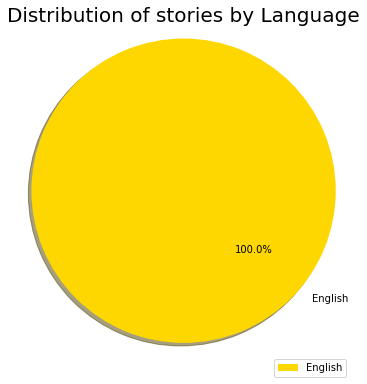

In [153]:
# create a pie chart
plt.figure(1, figsize=(6,6))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0, 0, 0, 0.1)
patches, texts, autotexts = plt.pie(stories_by_language["id"], 
                                    labels=stories_by_language["languageName"], colors=colors,
                                    autopct='%1.1f%%', shadow=True, startangle=140)

# set pie chart properties
plt.legend(patches, stories_by_language["languageName"], loc="best", bbox_to_anchor=(1,0))
plt.axis('equal')
plt.title("Distribution of stories by Language", size=20)

# plot and save image
plt.savefig("Images/dist_language_pie.png")
plt.show()

## Popularity of stories by category 

### Popularity of stories based on how many were read

In [154]:
popularity_df = category_grp.mean()
popularity_df

,categoryName,id,completed,numParts,deleted,length,categoryId,languageId,mature,rating,commentCount,readCount,voteCount
0,Action,6.660401e+07,0.200000,5.566667,0.0,26807.620000,14.0,1.0,0.000000,0.893333,15.760000,5975.686667,74.893333
1,Adventure,7.923675e+07,0.300000,17.200000,0.0,71912.800000,11.0,1.0,0.000000,1.100000,548.970000,102211.430000,3079.000000
2,Fantasy,6.814646e+07,0.240000,8.170000,0.0,38840.405000,3.0,1.0,0.000000,1.160000,50.455000,6596.560000,158.825000
3,Random,1.250628e+08,0.058559,4.990991,0.0,21280.882883,19.0,1.0,0.004505,0.409910,3.689189,150.554054,7.432432


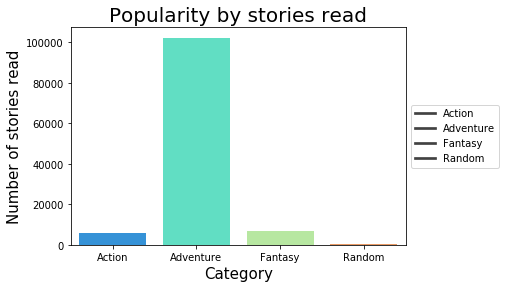

In [155]:
ax = sns.barplot(x=popularity_df["categoryName"], y=popularity_df["readCount"], data=popularity_df, palette='rainbow', label="Popularity by Stories read")
plt.title("Popularity by stories read", size=20)
plt.ylabel("Number of stories read", size=15)
plt.xlabel("Category", size=15)
plt.legend(popularity_df["categoryName"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Images/popularity_by_readCount.png")
plt.show()

### Popularity of stories based on Comments

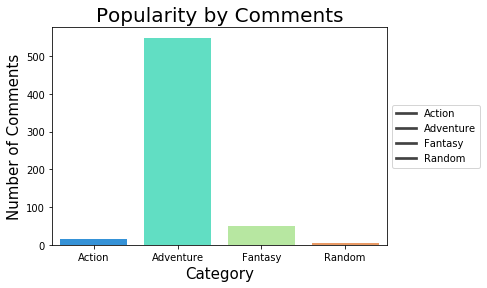

In [156]:
sns.barplot(x=popularity_df["categoryName"], y=popularity_df["commentCount"], data=popularity_df, palette='rainbow', label="Popularity by Comments")
plt.title("Popularity by Comments", size=20)
plt.ylabel("Number of Comments", size=15)
plt.xlabel("Category", size=15)
plt.legend(popularity_df["categoryName"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Images/popularity_by_comments.png")
plt.show()

### Popularity of stories based on Votes

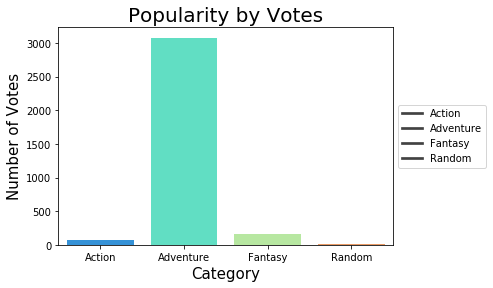

In [157]:
sns.barplot(x=popularity_df["categoryName"], y=popularity_df["voteCount"], data=popularity_df, palette='rainbow', label="Popularity by Votes")
plt.title("Popularity by Votes", size=20)
plt.ylabel("Number of Votes", size=15)
plt.xlabel("Category", size=15)
plt.legend(popularity_df["categoryName"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Images/popularity_by_votes.png")
plt.show()